In [36]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

from itertools import combinations
from sklearn.metrics import accuracy_score

import networkx as nx
import pylab as plt

## Data

In [37]:
# Reading the datasets

###### The 15 features #######
features = pd.read_csv('./15features.csv')

###### Seen Dataset ##########
seen_training = pd.read_csv('./seen-dataset/dataset_seen_training_siamese.csv')
seen_training.drop(['Unnamed: 0'], axis=1, inplace=True)

seen_val = pd.read_csv('./seen-dataset/dataset_seen_validation_siamese.csv')
seen_val.drop(['Unnamed: 0'], axis=1, inplace=True)

###### Shuffled Dataset ######
shuffled_training = pd.read_csv('./shuffled-dataset/dataset_shuffled_training_siamese.csv')
shuffled_training.drop(['Unnamed: 0'], axis=1, inplace=True)

shuffled_val = pd.read_csv('./shuffled-dataset/dataset_shuffled_validation_siamese.csv')
shuffled_val.drop(['Unnamed: 0'], axis=1, inplace=True)

###### Unseen Dataset #####
unseen_training = pd.read_csv('./unseen-dataset/dataset_unseen_training_siamese.csv')
unseen_training.drop(['Unnamed: 0'], axis=1, inplace=True)

unseen_val = pd.read_csv('./unseen-dataset/dataset_unseen_validation_siamese.csv')
unseen_val.drop(['Unnamed: 0'], axis=1, inplace=True)

In [38]:
######## Shapes of datasets ##########
print('Shape of Features dataset: ', features.shape)
print('Shape of seen_training dataset: ', seen_training.shape)
print('Shape of seen_validation dataset: ', seen_val.shape)
print('Shape of shuffled_training dataset: ', shuffled_training.shape)
print('Shape of shuffled_validation dataset: ', shuffled_val.shape)
print('Shape of unseen_training dataset: ', unseen_training.shape)
print('Shape of unseen_validation dataset: ', unseen_val.shape)

Shape of Features dataset:  (13570, 16)
Shape of seen_training dataset:  (114390, 3)
Shape of seen_validation dataset:  (906, 3)
Shape of shuffled_training dataset:  (102278, 3)
Shape of shuffled_validation dataset:  (5288, 3)
Shape of unseen_training dataset:  (129924, 3)
Shape of unseen_validation dataset:  (7580, 3)


In [39]:
seen_training.head()
seen_val.head()

,left,right,label
0,0901a_num1.png,0901a_num2.png,1
1,1194a_num2.png,1194a_num1.png,1
2,0300a_num2.png,0300a_num1.png,1
3,0872a_num2.png,0872a_num1.png,1
4,0080a_num2.png,0080a_num1.png,1


In [40]:
features.head()

,imagename,pen_pressure,letter_spacing,size,dimension,is_lowercase,is_continuous,slantness,tilt,entry_stroke_a,staff_of_a,formation_n,staff_of_d,exit_stroke_d,word_formation,constancy
0,0968c_num1.png,2,2,2,1,2,2,3,2,1,2,2,3,2,2,1
1,0809c_num2.png,2,2,2,2,2,2,3,1,1,2,2,3,1,2,2
2,0237b_num6.png,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2
3,0069b_num2.png,2,2,2,1,2,2,1,1,1,1,1,1,1,1,1
4,0966c_num4.png,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2


## Feature Concatenation

In [41]:
############### Seen Dataset #################
# Adding features to writer pairs images
concat1 = pd.merge(seen_training, features, how='inner', left_on='left', right_on='imagename')
concat2 = pd.merge(concat1, features, how='inner', left_on='right', right_on='imagename')
concat = concat2.drop(['imagename_x', 'imagename_y'], axis=1)

# re-ordering the columns
cols = list(concat) # creating a list of columns
cols.insert(33, cols.pop(cols.index('label'))) # moving the 'target' column to the end
concat = concat.loc[:, cols]

# # randomising the rows and using a random_state to maintain a state
seen_training_concat = concat.sample(frac=1, random_state=121).reset_index(drop = True)
print("\nShape of Seen Training Dataset With Feature Concatenation is:")
print(seen_training_concat.shape)
seen_training_concat.head()

######################## VALIDATION DATASET ####################
# Adding features to writer pairs images
concat1 = pd.merge(seen_val, features, how='inner', left_on='left', right_on='imagename')
concat2 = pd.merge(concat1, features, how='inner', left_on='right', right_on='imagename')
concat = concat2.drop(['imagename_x', 'imagename_y'], axis=1)

# re-ordering the columns
cols = list(concat) # creating a list of columns
cols.insert(33, cols.pop(cols.index('label'))) # moving the 'target' column to the end
concat = concat.loc[:, cols]

# # randomising the rows and using a random_state to maintain a state
seen_val_concat = concat.sample(frac=1, random_state=121).reset_index(drop = True)
print("\nShape of Seen Validation Dataset With Feature Concatenation is:")
print(seen_val_concat.shape)
# seen_val_concat.head()


Shape of Seen Training Dataset With Feature Concatenation is:
(111753, 33)

Shape of Seen Validation Dataset With Feature Concatenation is:
(894, 33)


In [42]:
############### Shuffled Dataset #############
# Adding features to writer pairs images
concat1 = pd.merge(shuffled_training, features, how='inner', left_on='left', right_on='imagename')
concat2 = pd.merge(concat1, features, how='inner', left_on='right', right_on='imagename')
concat = concat2.drop(['imagename_x', 'imagename_y'], axis=1)

# re-ordering the columns
cols = list(concat) # creating a list of columns
cols.insert(33, cols.pop(cols.index('label'))) # moving the 'target' column to the end
concat = concat.loc[:, cols]

# # randomising the rows and using a random_state to maintain a state
shuffled_training_concat = concat.sample(frac=1, random_state=121).reset_index(drop = True)
print("\nShape of Shuffled Training Dataset With Feature Concatenation is:")
print(shuffled_training_concat.shape)
shuffled_training_concat.head()

######################## VALIDATION DATASET ####################
# Adding features to writer pairs images
concat1 = pd.merge(shuffled_val, features, how='inner', left_on='left', right_on='imagename')
concat2 = pd.merge(concat1, features, how='inner', left_on='right', right_on='imagename')
concat = concat2.drop(['imagename_x', 'imagename_y'], axis=1)

# re-ordering the columns
cols = list(concat) # creating a list of columns
cols.insert(33, cols.pop(cols.index('label'))) # moving the 'target' column to the end
concat = concat.loc[:, cols]

# # randomising the rows and using a random_state to maintain a state
shuffled_val_concat = concat.sample(frac=1, random_state=121).reset_index(drop = True)
print("\nShape of Shuffled Validation Dataset With Feature Concatenation is:")
print(shuffled_val_concat.shape)
# shuffled_val_concat.head()


Shape of Shuffled Training Dataset With Feature Concatenation is:
(99825, 33)

Shape of Shuffled Validation Dataset With Feature Concatenation is:
(5240, 33)


In [43]:
############### unseen Dataset #############
# Adding features to writer pairs images
concat1 = pd.merge(unseen_training, features, how='inner', left_on='left', right_on='imagename')
concat2 = pd.merge(concat1, features, how='inner', left_on='right', right_on='imagename')
concat = concat2.drop(['imagename_x', 'imagename_y'], axis=1)

# re-ordering the columns
cols = list(concat) # creating a list of columns
cols.insert(33, cols.pop(cols.index('label'))) # moving the 'target' column to the end
concat = concat.loc[:, cols]

# # randomising the rows and using a random_state to maintain a state
unseen_training_concat = concat.sample(frac=1, random_state=121).reset_index(drop = True)
print("\nShape of UnSeen Training Dataset With Feature Concatenation is:")
print(unseen_training_concat.shape)
unseen_training_concat.head()

######################## VALIDATION DATASET ####################
# Adding features to writer pairs images
concat1 = pd.merge(unseen_val, features, how='inner', left_on='left', right_on='imagename')
concat2 = pd.merge(concat1, features, how='inner', left_on='right', right_on='imagename')
concat = concat2.drop(['imagename_x', 'imagename_y'], axis=1)

# re-ordering the columns
cols = list(concat) # creating a list of columns
cols.insert(33, cols.pop(cols.index('label'))) # moving the 'target' column to the end
concat = concat.loc[:, cols]

# # randomising the rows and using a random_state to maintain a state
unseen_val_concat = concat.sample(frac=1, random_state=121).reset_index(drop = True)
print("\nShape of UnSeen Validation Dataset With Feature Concatenation is:")
print(unseen_val_concat.shape)
# unseen_val_concat.head()


Shape of UnSeen Training Dataset With Feature Concatenation is:
(127273, 33)

Shape of UnSeen Validation Dataset With Feature Concatenation is:
(7221, 33)


## Bayesian Models

In [44]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import ExhaustiveSearch
from pgmpy.estimators import K2Score
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator

In [ ]:
# Finding Best Model
feature_values = features.iloc[:, 1:16]
feature_values.head()
# print(feature_values.shape)

# hc = HillClimbSearch(feature_values, scoring_method=K2Score(feature_values))
# best_model = hc.estimate(max_indegree=2)  #use max_indegree

print(best_model.edges())

In [46]:
#######################
##### Model 1 #####
#######################

# Bayesian Model and parameter estimation
model1 = BayesianModel([('letter_spacing_x', 'pen_pressure_x'), 
                        ('is_continuous_x', 'entry_stroke_a_x'), ('slantness_x', 'tilt_x'),
                        ('size_x', 'staff_of_d_x'), 
                        ('formation_n_x', 'dimension_x'),
                        ('staff_of_d_x', 'exit_stroke_d_x'), ('staff_of_d_x', 'is_lowercase_x'), 
                        ('word_formation_x', 'size_x'), ('constancy_x', 'staff_of_a_x'), 
                        ('letter_spacing_y', 'pen_pressure_y'),
                        ('is_continuous_y', 'entry_stroke_a_y'),('slantness_y', 'tilt_y'),
                        ('size_y', 'staff_of_d_y'), 
                        ('formation_n_y', 'dimension_y'),
                        ('staff_of_d_y', 'exit_stroke_d_y'), ('staff_of_d_y', 'is_lowercase_y'), 
                        ('word_formation_y', 'size_y'),('constancy_y', 'staff_of_a_y'),
                        ('staff_of_a_x', 'label'), ('staff_of_a_y', 'label')])

# Bayesian Parameter Estimation using fit()
import time
time_start = time.clock()
model1.fit(seen_training_concat, estimator=BayesianEstimator, prior_type='K2', equivalent_sample_size=100)
time_elapsed = (time.clock() - time_start)
print('Computation time for fit using model1: ', time_elapsed)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly defined
print('Model 1 check: ', model1.check_model())

#######################
##### Model 2 #####
#######################
# Bayesian Model and parameter estimation

model2 = BayesianModel([('letter_spacing_x', 'pen_pressure_x'), 
                        ('is_continuous_x', 'entry_stroke_a_x'), ('slantness_x', 'tilt_x'),
                        ('size_x', 'staff_of_d_x'), 
                        ('formation_n_x', 'dimension_x'),
                        ('staff_of_d_x', 'exit_stroke_d_x'), ('staff_of_d_x', 'is_lowercase_x'), 
                        ('word_formation_x', 'size_x'), ('constancy_x', 'staff_of_a_x'), 
                        ('letter_spacing_y', 'pen_pressure_y'),
                        ('is_continuous_y', 'entry_stroke_a_y'),('slantness_y', 'tilt_y'),
                        ('size_y', 'staff_of_d_y'), 
                        ('formation_n_y', 'dimension_y'),
                        ('staff_of_d_y', 'exit_stroke_d_y'), ('staff_of_d_y', 'is_lowercase_y'), 
                        ('word_formation_y', 'size_y'),('constancy_y', 'staff_of_a_y'),
                        ('constancy_y', 'size_y'), ('constancy_x', 'size_x'),
                        ('staff_of_a_x', 'label'), ('staff_of_a_y', 'label')])

# Bayesian Parameter Estimation using fit()
time_start = time.clock()
model2.fit(seen_training_concat, estimator=BayesianEstimator, prior_type='K2', equivalent_sample_size=100)
time_elapsed = (time.clock() - time_start)
print('Computation time for fit using model2: ', time_elapsed)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly defined
print('Model 2 check: ', model2.check_model())

#######################
#####  Model 3  #####
#######################
# Bayesian Model and parameter estimation
model3 = BayesianModel([('letter_spacing_x', 'pen_pressure_x'), 
                        ('is_continuous_x', 'entry_stroke_a_x'), ('slantness_x', 'tilt_x'),
                        ('size_x', 'staff_of_d_x'), 
                        ('formation_n_x', 'dimension_x'),
                        ('staff_of_d_x', 'exit_stroke_d_x'), ('staff_of_d_x', 'is_lowercase_x'), 
                        ('word_formation_x', 'size_x'), ('constancy_x', 'staff_of_a_x'), 
                        ('letter_spacing_y', 'pen_pressure_y'),
                        ('is_continuous_y', 'entry_stroke_a_y'),('slantness_y', 'tilt_y'),
                        ('size_y', 'staff_of_d_y'), 
                        ('formation_n_y', 'dimension_y'),
                        ('staff_of_d_y', 'exit_stroke_d_y'), ('staff_of_d_y', 'is_lowercase_y'), 
                        ('word_formation_y', 'size_y'),('constancy_y', 'staff_of_a_y'),
                        ('constancy_y', 'size_y'), ('word_formation_y', 'staff_of_a_y'),
                        ('constancy_x', 'size_x'), ('word_formation_x', 'staff_of_a_x'),
                        ('staff_of_a_x', 'label'), ('staff_of_a_y', 'label')])

# Bayesian Parameter Estimation using fit()
time_start = time.clock()
model3.fit(seen_training_concat, estimator=BayesianEstimator, prior_type='K2', equivalent_sample_size=100)
time_elapsed = (time.clock() - time_start)
print('Computation time for fit using model3: ', time_elapsed)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly defined
print('Model 3 check: ', model3.check_model())

Computation time for fit using model1:  4.3765626
Model 1 check:  True
Computation time for fit using model2:  4.194758899999999
Model 2 check:  True
Computation time for fit using model3:  3.9418203
Model 3 check:  True


In [47]:
# Evaluating the fit
k2 = K2Score(seen_training_concat)

print('Model 1 K2 Score: ' + str(k2.score(model1)))
print('Model 2 K2 Score: ' + str(k2.score(model2)))
print('Model 3 K2 Score: ' + str(k2.score(model3)))

Model 1 K2 Score: -2533282.8860581904
Model 2 K2 Score: -2528411.997269278
Model 3 K2 Score: -2524527.4315670864


Plot of Model 3: 


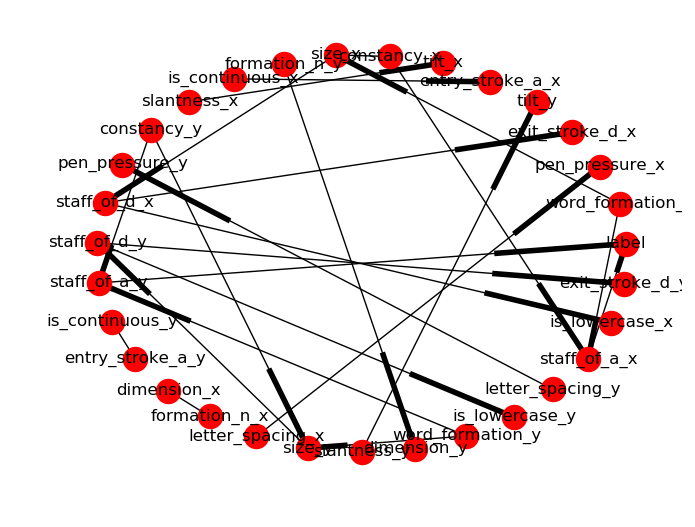

In [48]:
## Plotting the Bayesian Model graph
import networkx as nx
import pylab as plt

print('Plot of Model 3: ')
nx.draw(model3, with_labels=True)
plt.show()

##### Predictions and Accuracies

##### Seen Dataset

In [49]:
temp = seen_val_concat.iloc[:, 2:]
seen_val_infer = temp.iloc[:, 0:30]-1
seen_val_infer['label'] = temp['label'].values
seen_val_infer.head()

,pen_pressure_x,letter_spacing_x,size_x,dimension_x,is_lowercase_x,is_continuous_x,slantness_x,tilt_x,entry_stroke_a_x,staff_of_a_x,...,slantness_y,tilt_y,entry_stroke_a_y,staff_of_a_y,formation_n_y,staff_of_d_y,exit_stroke_d_y,word_formation_y,constancy_y,label
0,0,2,2,2,1,0,0,0,0,1,...,0,0,0,2,1,1,0,0,1,0
1,1,1,1,1,1,1,2,0,0,3,...,1,0,0,3,1,1,1,0,1,1
2,1,1,1,1,1,0,0,0,0,0,...,1,0,0,1,0,2,1,0,0,1
3,0,2,2,2,1,0,0,0,0,1,...,3,0,0,3,1,2,3,1,0,0
4,1,1,1,0,1,1,1,0,0,1,...,0,0,0,1,1,2,1,0,1,1


In [50]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model3)
counter = 0

time_start = time.clock()
for index, row in seen_val_infer.iterrows():
    mle1 = inference.map_query(variables={'label'})
    
    if(mle1['label']) == row['label']:
        counter += 1
time_elapsed = (time.clock() - time_start)
print('Computation time for inference using "Bayesian Network": ', time_elapsed)  

print('Seen Validation Dataset Accuracy is: '+ str(counter/seen_val_concat.shape[0]*100))

Computation time for inference using "Bayesian Network":  45.024665600000006
Seen Validation Dataset Accuracy is: 49.77628635346756


In [51]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model3)
counter = 0

time_start = time.clock()
for index, row in seen_val_infer.iterrows():
    mle1 = inference.map_query(variables={'label'}, 
                               evidence = {
'letter_spacing_x': row['letter_spacing_x'],
'pen_pressure_x': row['pen_pressure_x'],
'is_continuous_x': row['is_continuous_x'],
'entry_stroke_a_x': row['entry_stroke_a_x'],
'slantness_x': row['slantness_x'],
'tilt_x': row['tilt_x'],
'size_x': row['size_x'],
'staff_of_d_x': row['staff_of_d_x'],
'formation_n_x': row['formation_n_x'],
'dimension_x': row['dimension_x'],
'exit_stroke_d_x': row['exit_stroke_d_x'],
'is_lowercase_x': row['is_lowercase_x'],
'word_formation_x': row['word_formation_x'],
'constancy_x': row['constancy_x'],
'staff_of_a_x': row['staff_of_a_x'],
'letter_spacing_y': row['letter_spacing_y'],
'pen_pressure_y': row['pen_pressure_y'],
'is_continuous_y': row['is_continuous_y'],
'entry_stroke_a_y': row['entry_stroke_a_y'],
'slantness_y': row['slantness_y'],
'tilt_y': row['tilt_y'],
'size_y': row['size_y'],
'formation_n_y': row['formation_n_y'],
'dimension_y': row['dimension_y'],
'exit_stroke_d_y': row['exit_stroke_d_y'],
'staff_of_d_y': row['staff_of_d_y'],
'is_lowercase_y': row['is_lowercase_y'],
'word_formation_y': row['word_formation_y'],
'constancy_y': row['constancy_y'],
'staff_of_a_y': row['staff_of_a_y']})
    
    if(mle1['label']) == row['label']:
        counter += 1

time_elapsed = (time.clock() - time_start)
print('Computation time for inference using "Bayesian Network": ', time_elapsed)         
print('Seen Validation Dataset Accuracy is: '+ str(counter/seen_val_concat.shape[0]*100))

Computation time for inference using "Bayesian Network":  34.1706427
Seen Validation Dataset Accuracy is: 36.68903803131991


###### Shuffled Dataset

In [52]:
# Evaluating the fit
k2 = K2Score(shuffled_training_concat)

print('Model 1 K2 Score: ' + str(k2.score(model1)))
print('Model 2 K2 Score: ' + str(k2.score(model2)))
print('Model 3 K2 Score: ' + str(k2.score(model3)))

Model 1 K2 Score: -2268686.6028322475
Model 2 K2 Score: -2263798.6466441425
Model 3 K2 Score: -2260734.5084508834


In [53]:
temp = shuffled_val_concat.iloc[:, 2:]
shuffled_val_infer = temp.iloc[:, 0:30]-1
shuffled_val_infer['label'] = temp['label'].values
shuffled_val_infer.head()

,pen_pressure_x,letter_spacing_x,size_x,dimension_x,is_lowercase_x,is_continuous_x,slantness_x,tilt_x,entry_stroke_a_x,staff_of_a_x,...,slantness_y,tilt_y,entry_stroke_a_y,staff_of_a_y,formation_n_y,staff_of_d_y,exit_stroke_d_y,word_formation_y,constancy_y,label
0,0,0,2,0,1,1,0,0,0,3,...,0,0,0,3,1,0,0,0,0,1
1,1,0,1,1,1,1,1,0,0,3,...,1,1,0,3,1,1,2,0,1,1
2,1,1,1,1,1,1,1,0,0,1,...,1,0,0,1,0,2,1,0,1,0
3,1,1,1,1,1,1,1,0,0,1,...,0,0,0,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [54]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model3)
counter = 0

time_start = time.clock()
for index, row in shuffled_val_infer.iterrows():
    mle1 = inference.map_query(variables={'label'})
    
    if(mle1['label']) == row['label']:
        counter += 1
time_elapsed = (time.clock() - time_start)
print('Computation time for inference using "Bayesian Network": ', time_elapsed)  

print('shuffled Validation Dataset Accuracy is: '+ str(counter/shuffled_val_concat.shape[0]*100))

Computation time for inference using "Bayesian Network":  267.558932
shuffled Validation Dataset Accuracy is: 50.09541984732825


In [55]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model3)
counter = 0

time_start = time.clock()
for index, row in shuffled_val_infer.iterrows():
    mle1 = inference.map_query(variables={'label'}, 
                               evidence = {
'letter_spacing_x': row['letter_spacing_x'],
'pen_pressure_x': row['pen_pressure_x'],
'is_continuous_x': row['is_continuous_x'],
'entry_stroke_a_x': row['entry_stroke_a_x'],
'slantness_x': row['slantness_x'],
'tilt_x': row['tilt_x'],
'size_x': row['size_x'],
'staff_of_d_x': row['staff_of_d_x'],
'formation_n_x': row['formation_n_x'],
'dimension_x': row['dimension_x'],
'exit_stroke_d_x': row['exit_stroke_d_x'],
'is_lowercase_x': row['is_lowercase_x'],
'word_formation_x': row['word_formation_x'],
'constancy_x': row['constancy_x'],
'staff_of_a_x': row['staff_of_a_x'],
'letter_spacing_y': row['letter_spacing_y'],
'pen_pressure_y': row['pen_pressure_y'],
'is_continuous_y': row['is_continuous_y'],
'entry_stroke_a_y': row['entry_stroke_a_y'],
'slantness_y': row['slantness_y'],
'tilt_y': row['tilt_y'],
'size_y': row['size_y'],
'formation_n_y': row['formation_n_y'],
'dimension_y': row['dimension_y'],
'exit_stroke_d_y': row['exit_stroke_d_y'],
'staff_of_d_y': row['staff_of_d_y'],
'is_lowercase_y': row['is_lowercase_y'],
'word_formation_y': row['word_formation_y'],
'constancy_y': row['constancy_y'],
'staff_of_a_y': row['staff_of_a_y']})
    
    if(mle1['label']) == row['label']:
        counter += 1

time_elapsed = (time.clock() - time_start)
print('Computation time for inference using "Bayesian Network": ', time_elapsed)         
print('shuffled Validation Dataset Accuracy is: '+ str(counter/shuffled_val_concat.shape[0]*100))

Computation time for inference using "Bayesian Network":  214.25121080000008
shuffled Validation Dataset Accuracy is: 38.07251908396946


##### Unseen Dataset

In [56]:
# Evaluating the fit
k2 = K2Score(unseen_training_concat)

print('Model 1 K2 Score: ' + str(k2.score(model1)))
print('Model 2 K2 Score: ' + str(k2.score(model2)))
print('Model 3 K2 Score: ' + str(k2.score(model3)))

Model 1 K2 Score: -2891077.8643726865
Model 2 K2 Score: -2888104.4619813673
Model 3 K2 Score: -2885682.7925266502


In [57]:
temp = unseen_val_concat.iloc[:, 2:]
unseen_val_infer = temp.iloc[:, 0:30]-1
unseen_val_infer['label'] = temp['label'].values
unseen_val_infer.head()

,pen_pressure_x,letter_spacing_x,size_x,dimension_x,is_lowercase_x,is_continuous_x,slantness_x,tilt_x,entry_stroke_a_x,staff_of_a_x,...,slantness_y,tilt_y,entry_stroke_a_y,staff_of_a_y,formation_n_y,staff_of_d_y,exit_stroke_d_y,word_formation_y,constancy_y,label
0,1,2,2,1,1,0,0,0,0,1,...,2,0,0,0,1,2,0,0,1,1
1,0,1,1,0,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
2,1,1,1,1,1,0,3,0,0,1,...,0,0,0,2,1,2,1,0,1,1
3,1,1,1,1,1,1,0,0,0,1,...,0,0,0,1,1,1,3,1,1,1
4,0,1,1,1,1,0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0


In [58]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model1)
counter = 0

time_start = time.clock()
for index, row in unseen_val_infer.iterrows():
    mle1 = inference.map_query(variables={'label'})
    
    if(mle1['label']) == row['label']:
        counter += 1
time_elapsed = (time.clock() - time_start)
print('Computation time for inference using "Bayesian Network": ', time_elapsed)  

print('unseen Validation Dataset Accuracy is: '+ str(counter/unseen_val_concat.shape[0]*100))

Computation time for inference using "Bayesian Network":  203.31047720000004
unseen Validation Dataset Accuracy is: 50.71319761805844


In [59]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model1)
counter = 0

time_start = time.clock()
for index, row in unseen_val_infer.iterrows():
    mle1 = inference.map_query(variables={'label'}, 
                               evidence = {
'letter_spacing_x': row['letter_spacing_x'],
'pen_pressure_x': row['pen_pressure_x'],
'is_continuous_x': row['is_continuous_x'],
'entry_stroke_a_x': row['entry_stroke_a_x'],
'slantness_x': row['slantness_x'],
'tilt_x': row['tilt_x'],
'size_x': row['size_x'],
'staff_of_d_x': row['staff_of_d_x'],
'formation_n_x': row['formation_n_x'],
'dimension_x': row['dimension_x'],
'exit_stroke_d_x': row['exit_stroke_d_x'],
'is_lowercase_x': row['is_lowercase_x'],
'word_formation_x': row['word_formation_x'],
'constancy_x': row['constancy_x'],
'staff_of_a_x': row['staff_of_a_x'],
'letter_spacing_y': row['letter_spacing_y'],
'pen_pressure_y': row['pen_pressure_y'],
'is_continuous_y': row['is_continuous_y'],
'entry_stroke_a_y': row['entry_stroke_a_y'],
'slantness_y': row['slantness_y'],
'tilt_y': row['tilt_y'],
'size_y': row['size_y'],
'formation_n_y': row['formation_n_y'],
'dimension_y': row['dimension_y'],
'exit_stroke_d_y': row['exit_stroke_d_y'],
'staff_of_d_y': row['staff_of_d_y'],
'is_lowercase_y': row['is_lowercase_y'],
'word_formation_y': row['word_formation_y'],
'constancy_y': row['constancy_y'],
'staff_of_a_y': row['staff_of_a_y']})
    
    if(mle1['label']) == row['label']:
        counter += 1

time_elapsed = (time.clock() - time_start)
print('Computation time for inference using "Bayesian Network": ', time_elapsed)         
print('unseen Validation Dataset Accuracy is: '+ str(counter/unseen_val_concat.shape[0]*100))

Computation time for inference using "Bayesian Network":  224.9480729999999
unseen Validation Dataset Accuracy is: 36.933942667220606
